In [1]:
import numpy as np
from pandas import DataFrame as df

### Load the 3 dataset splits

In [2]:
from utils import load_dataset

val_set, _ = load_dataset('validation')
test_set, _ = load_dataset('test')
train_set, class_list = load_dataset('train')
datasets = {'validation':val_set, 'test':test_set,'train':train_set}

### Print class counts for each split

In [3]:
df({k:v['y'].value_counts() for k,v  in datasets.items()})

,validation,test,train
None of the above,168,280,672
Collaborative or Interactive AI,85,142,341
Acting or Performing machine,50,83,199
Complex AI,35,59,140
Thinking machine,25,42,100
Mysterious AI,8,13,32
Learning or recognition machine,2,3,9
Superior human,2,3,6


Some of these counts are horrible. The number of examples in 'Learning or recognition machine', 'Superior human' and 'Mysterious AI' are really to small. Also, the 'None of the above' class is very large, although that's not really a problem.

### Show some images of each class

In [4]:
import ipywidgets as widgets
import IPython.display as display

def plot_images_from_class(cls, n=5):
    print(cls)
    current_dir = base_dir / 'train' / (cls)
    all_image_paths = [f for f in current_dir.iterdir()]
    n_image_paths = np.random.choice(all_image_paths, n, replace=False)
    file_objs = [open(path, 'rb').read() for path in n_image_paths]
    im_widgets = [widgets.Image(value=f, format='jpg', width=150, height=150) for f in file_objs]
    side_by_side = widgets.HBox(im_widgets)
    display.display(side_by_side)

for cls in class_list:
    #plot_images_from_class(cls)  # Don't commit this output to repo!
    pass

### Performance metrics for majority vote baseline

In [5]:
predicted = ['None of the above' for _ in val_set['y']]
trues = val_set['y'].values

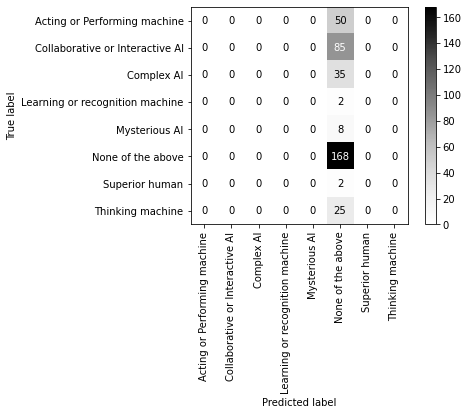

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion = confusion_matrix(trues, predicted)
#df(confusion, columns=[cls[:8] for cls in class_list], index=class_list)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion,                               display_labels=class_list)
_ = disp.plot(cmap='Greys', xticks_rotation='vertical')


In [7]:
from utils import print_performance_metrics

print_performance_metrics(trues, predicted, class_list)


accuracy_score 0.448
recall_score [0. 0. 0. 0. 0. 1. 0. 0.]
precision_score [0.    0.    0.    0.    0.    0.448 0.    0.   ]
f1_score [0.         0.         0.         0.         0.         0.61878453
 0.         0.        ]
krippendorff.alpha -0.22985983892943374


C:\Users\ChristiaanMeijer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
